In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
df =pd.read_csv('sales.csv')
df.head(6)

,Sklep,Produkt,Miesiąc,SumaSprzedaży,IloscTransakcji,Przychod,Promocja
0,RTV_Euro_AGD,Telewizor,Luty,140,32,700,Nie
1,RTV_Euro_AGD,Laptop,Marzec,90,28,450,Tak
2,RTV_Euro_AGD,Smartfon,Wrzesień,170,45,850,Nie
3,Media_Markt,Telewizor,Listopad,150,38,750,Tak
4,Media_Markt,Laptop,Czerwiec,95,30,475,Nie
5,Media_Markt,Smartfon,Sierpień,180,48,900,Tak


In [126]:
grouped_data = df.groupby(['Sklep', 'Produkt'])

# Obliczenie sumy, średniej, maksimum i minimum sprzedaży dla każdego sklepu i produktu
summary_data = grouped_data['SumaSprzedaży'].agg(['sum', 'mean', 'max', 'min']).reset_index()

# Obliczenie sumy sprzedaży ogółem dla każdego sklepu
total_sales_by_store = df.groupby('Sklep')['SumaSprzedaży'].sum()

# Znalezienie sklepu z największą sumą sprzedaży ogółem
top_selling_store = total_sales_by_store.idxmax()
top_selling_store_total_sales = total_sales_by_store.loc[top_selling_store]
print("Analiza ogólna:")
print("\nSuma, średnia, maksimum i minimum sprzedaży dla każdego sklepu i produktu:")
print(summary_data)
print(f"Najlepszy sklep: {top_selling_store}, Suma sprzedaży: {top_selling_store_total_sales}")


Analiza ogólna:

Suma, średnia, maksimum i minimum sprzedaży dla każdego sklepu i produktu:
          Sklep    Produkt  sum   mean  max  min
0  Media_Expert     Laptop  354   88.5   92   85
1  Media_Expert   Smartfon  670  167.5  175  160
2  Media_Expert  Telewizor  540  135.0  140  130
3   Media_Markt     Laptop  410  102.5  105   95
4   Media_Markt   Smartfon  800  200.0  210  180
5   Media_Markt  Telewizor  640  160.0  170  150
6  RTV_Euro_AGD     Laptop  380   95.0  100   90
7  RTV_Euro_AGD   Smartfon  720  180.0  190  170
8  RTV_Euro_AGD  Telewizor  600  150.0  160  140
Najlepszy sklep: Media_Markt, Suma sprzedaży: 1850


In [60]:
grouped = df.groupby(['Sklep','Produkt'])
all_data = grouped['SumaSprzedaży'].agg(['sum','mean','max','min']).round(1) #agg mozna wybierac jakie chcemy
all_data
sales_by_store = df.groupby('Sklep')['SumaSprzedaży'].sum().round(1)
top_selling_store = sales_by_store.idxmax()#bardzo wazne biggest_value = new_df.idxmax()

print("Sklep z najwieksza sprzedaża",top_selling_store)

Sklep z najwieksza sprzedaża Media_Markt


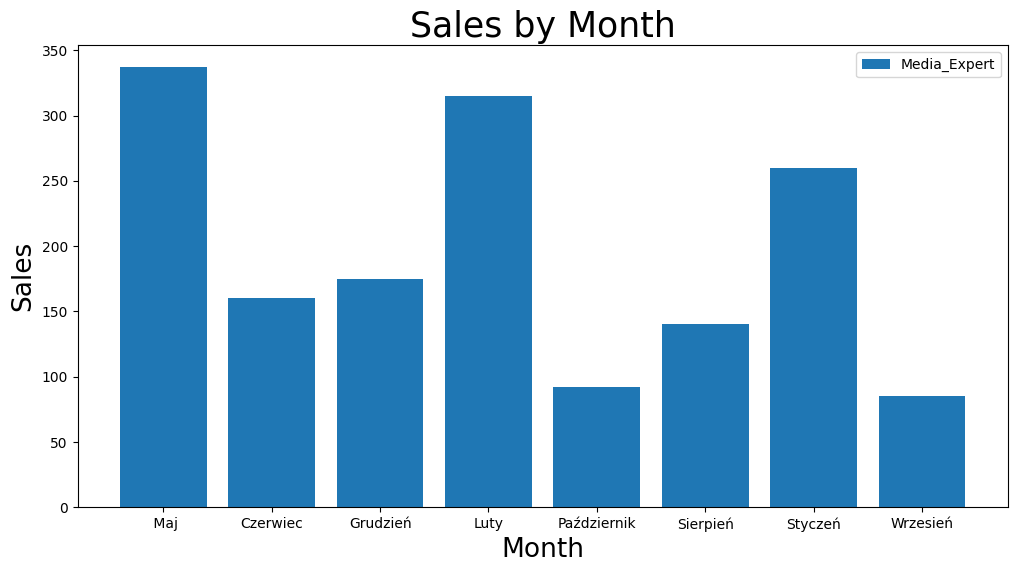

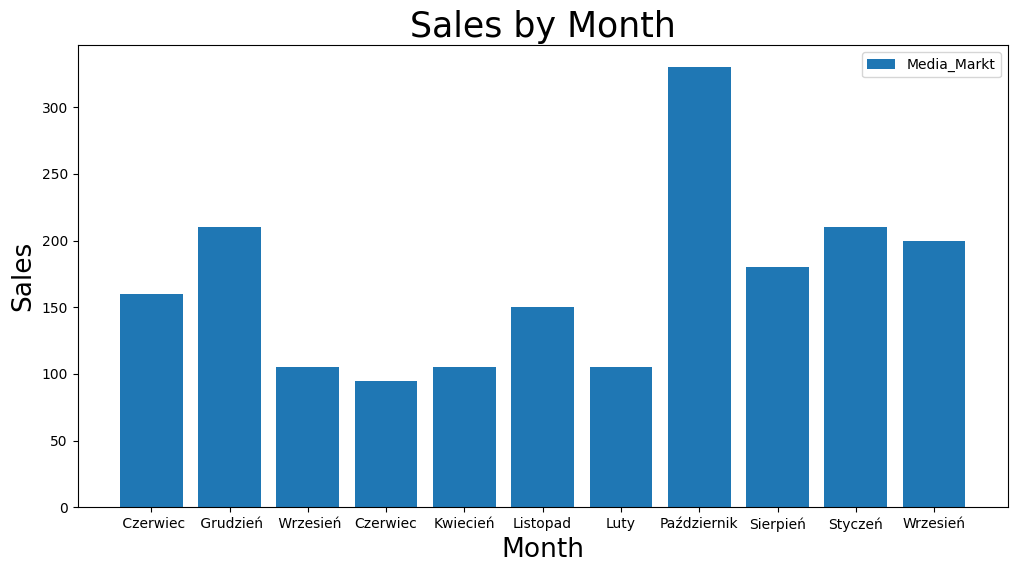

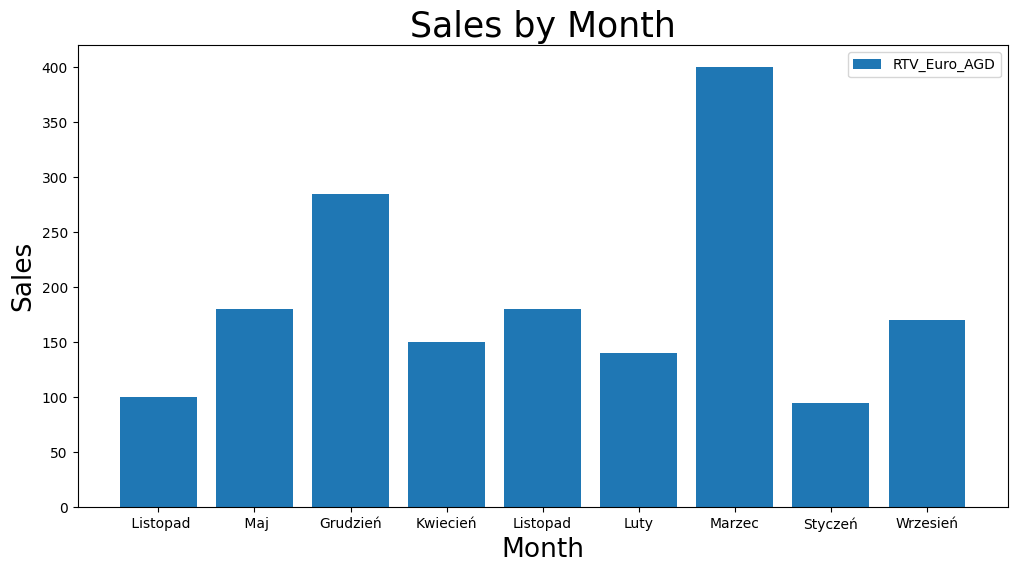

7          Maj
16    Wrzesień
1       Marzec
Name: Miesiąc, dtype: object

In [127]:

grouped_by_month = df.groupby(['Sklep','Miesiąc'])
monthly_sales = grouped_by_month["SumaSprzedaży"].sum().reset_index()# wazne zeby pamietac o reset index


for store in monthly_sales['Sklep'].unique():
    store_data = monthly_sales[monthly_sales['Sklep'] == store]


    plt.figure(figsize=(12, 6))
    plt.bar(store_data['Miesiąc'], store_data['SumaSprzedaży'], label=store)
    plt.ylabel('Sales',fontsize = 19)
    plt.xlabel('Month',fontsize = 19)
    plt.title('Sales by Month', fontsize = 25)
    plt.legend()
plt.show()
max_sales_by_month = df.loc[df['SumaSprzedaży'].idxmax()]['Miesiąc']
max_sales_by_month
top_3_indices = df.loc[df['SumaSprzedaży'].nsmallest(3).index]['Miesiąc']
top_3_indices


In [154]:

promocja = df[df["Promocja"]=='Tak']
promocja_sales_bymonth = promocja.groupby("Miesiąc")["SumaSprzedaży"].sum()
print(promocja_sales_bymonth)


no_promocja = df[df["Promocja"]=='Nie']
no_promocja_sales_bymonth = no_promocja.groupby("Miesiąc")["SumaSprzedaży"].sum()
print("\n\n\n\n",no_promocja_sales_bymonth)


Miesiąc
 Maj         425
 Wrzesień    105
Grudzień     365
Kwiecień     255
Listopad     330
Luty         420
Marzec       400
Sierpień     320
Styczeń      130
Name: SumaSprzedaży, dtype: int64




 Miesiąc
 Czerwiec      160
 Grudzień      210
 Listopad      100
 Maj            92
Czerwiec       255
Grudzień        95
Luty           140
Październik    422
Styczeń        435
Wrzesień       455
Name: SumaSprzedaży, dtype: int64


In [ ]:
'''
Analiza trendów czasowych:





Utwórz wykres pudełkowy, aby zobaczyć rozkład sprzedaży dla każdego sklepu.
Zidentyfikuj ewentualne odstępstwa od normy (outliers).
Korelacje między zmiennymi:

Sprawdź, czy istnieje korelacja między ilością transakcji a sumą sprzedaży.
Zbadaj korelację między promocją a sumą sprzedaży.
Analiza produktów bestsellerów:

Zidentyfikuj najlepiej i najgorzej sprzedające się produkty we wszystkich sklepach.
Przeprowadź analizę, aby zrozumieć, dlaczego niektóre produkty osiągają lepsze wyniki niż inne.
Mapa cieplna korelacji:

Stwórz mapę cieplną korelacji między wszystkimi zmiennymi w danych.
Analiza sezonowości:

Sprawdź, czy istnieje sezonowość w danych sprzedaży (np. czy określone miesiące są bardziej korzystne dla sprzedaży niż inne).
Analiza regionów zysku:

Jeśli dostępne są informacje o regionach sklepów, przeanalizuj, czy istnieją regiony, które generują większe zyski niż inne.
Przypominam, że te zadania to jedynie propozycje, a Ty możesz dostosować je do swoich konkretnych potrzeb i celów analizy danych.
'''